#### CSCE 670 :: Information Storage and Retrieval :: Texas A&M University :: Spring 2017


# Project: Different Faces of a City


Team members: ...

Project description here...

## Introduction

This project ...

The paper we are referring to...
* http://courses.cse.tamu.edu/caverlee/csce670_2013/livehoods-paper.pdf

We implemented **our algorithm** from scratch.

You can see the code below...



In [150]:
# Data Structure

import string
import glob, os
import re

# Input: Filename of checkin data
# Return: {venueid : [{userid : time}, {userid : time}, ...], ... }

def get_venue_checkin(filename):
    ret = {}
    
    fp = open(filename, 'r')
    lines = fp.readlines()
    
    for line in lines:
        checkin_time = {}
        arr = re.split("\t", line)
        
        userid = arr[0]
        venueid = arr[1]
        time = re.split(' ', arr[2])
        hour = time[3][0:2]
        
        checkin_time[userid] = hour

        if not ret.has_key(venueid):
            ret[venueid]=[checkin_time]
        else:
            ret[venueid].append(checkin_time)
            
    return ret

#austin_venue_checkin = get_venue_checkin("austin_checkin.txt")
#houston_venue_checkin = get_venue_checkin("houston_checkin.txt")

In [151]:
# Input: Filename of checkin data
# Return: {venueid : {"latitiude" : latitude, "longitude" : longitude, "type" : type}, ...}

def get_venue_info(filename):
    ret = {}
    
    fp = open(filename, 'r')
    lines = fp.readlines()

    for line in lines:
        arr = re.split("\t", line)
        
        venue_info = {}
        
        venueid = arr[0]
        venue_info["latitude"] = arr[1]
        venue_info["longitude"] = arr[2]
        venue_info["type"] = arr[3]
        
        ret[venueid] = venue_info

    return ret

austin_venue = get_venue_info("austin_venue.txt")
houston_venue = get_venue_info("houston_venue.txt")

In [152]:
# Create hour histogram
# Input: Filename of checkin data, period in hours
# Return: [freq@0-period, freq@1-2*period, ...]

def create_histogram(filename, period):
    ret = {}
    
    fp = open(filename, 'r')
    lines = fp.readlines()

    for line in lines:
        arr = re.split('\t', line)
        
        time = re.split(' ', arr[2])
        hour = int(int(time[3][0:2])/period)
        
        if not ret.has_key(hour):
            ret[hour] = 1
        else:
            ret[hour] += 1
            
    sorted_keys = sorted(ret)
    
    ret_list = []
    
    for k in sorted_keys:
        ret_list.append((k, ret[k]))
            
    return ret_list

austin_histogram = create_histogram("austin_checkin.txt", 1)
houston_histogram = create_histogram("houston_checkin.txt", 1)

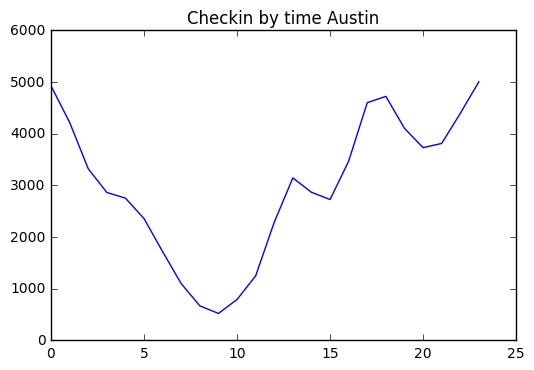

In [153]:
import matplotlib.pyplot as plt
austin_time=[]
austin_checkin=[]

def austin_strip():
    count=0
    for elements in austin_histogram:
        austin_time.append(elements[0])
        austin_checkin.append(elements[1])
        count+=1
austin_strip()
plt.plot(austin_time,austin_checkin)
plt.title("Checkin by time Austin")
plt.show()

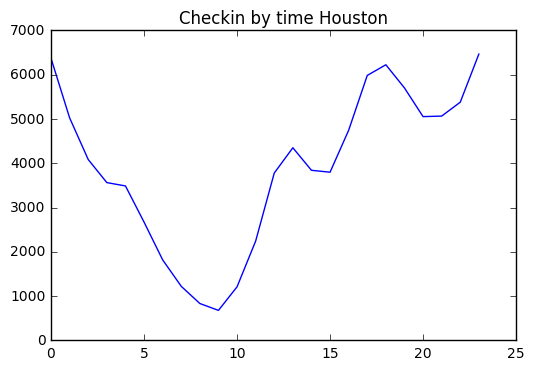

In [154]:
houston_time=[]
houston_checkin=[]
def houston_strip():
    count=0
    for elements in houston_histogram:
        houston_time.append(elements[0])
        houston_checkin.append(elements[1])
        count+=1
houston_strip()
plt.plot(houston_time,houston_checkin)
plt.title("Checkin by time Houston")
plt.show()

In [155]:
from collections import defaultdict

# Input: Filename of checkin data, period in hours
# Return: {hour : {venueid : {userid : checkin_freq, ...}, ...}, ...}

def get_checkin_freq_by_hour(filename):
    ret = defaultdict(lambda : defaultdict(dict))
    
    fp = open(filename, 'r')
    lines = fp.readlines()

    for line in lines:
        arr = re.split('\t', line)
        
        userid = arr[0]
        venueid = arr[1]
        time = re.split(' ', arr[2])
        hour = int(time[3][0:2])
        if not ret.has_key(hour):
            ret[hour][venueid][userid] = 1
        else:
            if not ret[hour].has_key(venueid):
                ret[hour][venueid][userid] = 1
            else:
                if not ret[hour][venueid].has_key(userid):
                    ret[hour][venueid][userid] = 1
                else:
                    ret[hour][venueid][userid] += 1
                    
    return ret
    
austin_checkin_freq = get_checkin_freq_by_hour("austin_checkin.txt")
houston_checkin_freq = get_checkin_freq_by_hour("houston_checkin.txt")

In [156]:
# Input: {hour : {venueid : {userid : checkin_freq, ...}, ...}, ...}, 
#        {venueid : {"latitiude" : latitude, "longitude" : longitude, "type" : type}, ...},
#        period in hours
# Return {hour : {venue_type : freq, ...}, ...}

def create_pie_chart(freq, info):
    ret = {}
    
    for hour, venues in freq.iteritems():
        for venueid, users in venues.iteritems():
            venue_type = info[venueid]["type"]
            
            checkin_total = 0
            for userid, checkin_count in users.iteritems():
                checkin_total += checkin_count
                
            if not ret.has_key(hour):
                ret[hour] = {}
                ret[hour][venue_type] = checkin_total
                
            else:
                if not ret[hour].has_key(venue_type):
                    ret[hour][venue_type] = checkin_total
                else:
                    ret[hour][venue_type] += checkin_total      
    return ret
austin_pie_chart = create_pie_chart(austin_checkin_freq, austin_venue)
houston_pie_chart = create_pie_chart(houston_checkin_freq, houston_venue)

In [169]:
import urllib2
main_category=[['Arts', '&', 'Entertainment'], ['College', '&', 'University'], ['Event'],['Food'],['Nightlife', 'Spot'],['Outdoors', '&', 'Recreation'], ['Professional', '&', 'Other', 'Places'], ['Travel', '&', 'Transport']]
def hierarchy_scrap():
    category=dict()
    all_category=[]
    url = "https://developer.foursquare.com/categorytree"
    response = urllib2.urlopen(url)
    for line in response:
        arr = line.split()
        if not arr:
            pass
        elif arr[0]=="Suggested":
            pass
        elif arr[0]=="var":
            pass
        elif arr[0]=="if":
            pass
        elif arr[0]=="ga.src":
            pass
        elif arr[0][0]=="<":
            pass
        elif arr[0][0]=="$":
            pass
        elif arr[0][0]=="&":
            pass
        elif arr[0][0]=="}":
            pass
        elif arr[0][0]=="_":
            pass
        elif arr[0][0]=="(":
            pass
        elif arr[0][0]=="/":
            pass
        else:
            all_category.append(arr)
    for categories in all_category:
        count=0
        for words in categories:
            if words == '&amp;':
                categories[count]='&'
            count+=1
    for categories in all_category:
        if categories in main_category:
            upper_category=categories
        else:
            string=" ".join(categories)
            category[string]=" ".join(upper_category)
    for cat in main_category:
        string=" ".join(cat)
        category[string]=" ".join(cat)
    return category
category_hierarchy=hierarchy_scrap()


In [176]:
def filtered_pie_chart(town_checkin):
    ret=dict()
    for hours, information in town_checkin.items():
        for sub_categories, count in information.items():
            if category_hierarchy.has_key(sub_categories):
                high_categories=category_hierarchy[sub_categories]
                if not ret.has_key(hours):
                    ret[hours]={}
                    ret[hours][high_categories] = count
                else:
                    if not ret[hours].has_key(high_categories):
                        ret[hours][high_categories] = count
                    else:
                        ret[hours][high_categories] += count
            else:
                pass
                #print sub_categories, count
            
    return ret
    
austin_filtered=filtered_pie_chart(austin_pie_chart)
print austin_filtered

#houston_filetered=filtered_pie_chart(houston_pie_chart)

{0: {'College & University': 106, 'Food': 1651, 'Travel & Transport': 241, 'Outdoors & Recreation': 378, 'Arts & Entertainment': 507, 'Nightlife Spot': 714, 'Professional & Other Places': 1180}, 1: {'College & University': 64, 'Food': 1465, 'Travel & Transport': 201, 'Outdoors & Recreation': 264, 'Arts & Entertainment': 441, 'Nightlife Spot': 755, 'Professional & Other Places': 927}, 2: {'College & University': 35, 'Food': 1028, 'Travel & Transport': 144, 'Outdoors & Recreation': 134, 'Arts & Entertainment': 433, 'Nightlife Spot': 836, 'Professional & Other Places': 647}, 3: {'College & University': 30, 'Food': 563, 'Travel & Transport': 188, 'Outdoors & Recreation': 82, 'Arts & Entertainment': 427, 'Nightlife Spot': 1007, 'Professional & Other Places': 528}, 4: {'College & University': 24, 'Food': 381, 'Travel & Transport': 244, 'Outdoors & Recreation': 85, 'Arts & Entertainment': 328, 'Nightlife Spot': 1212, 'Professional & Other Places': 447}, 5: {'College & University': 12, 'Food':

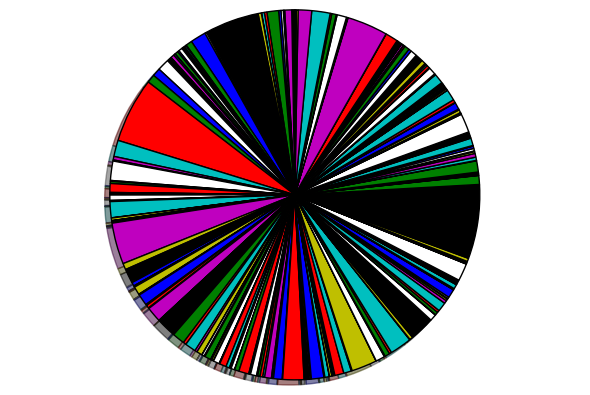

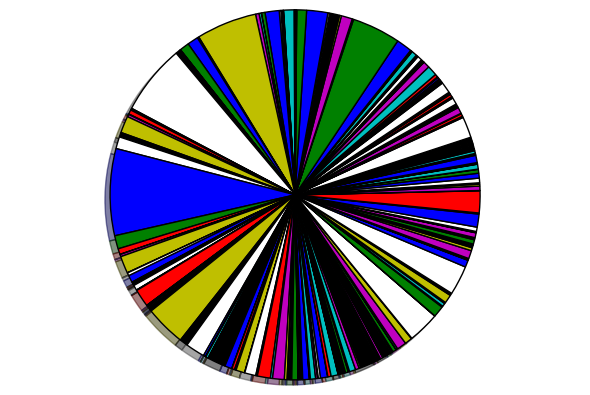

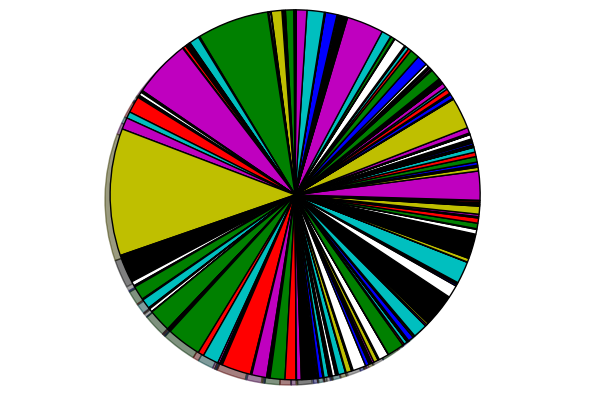

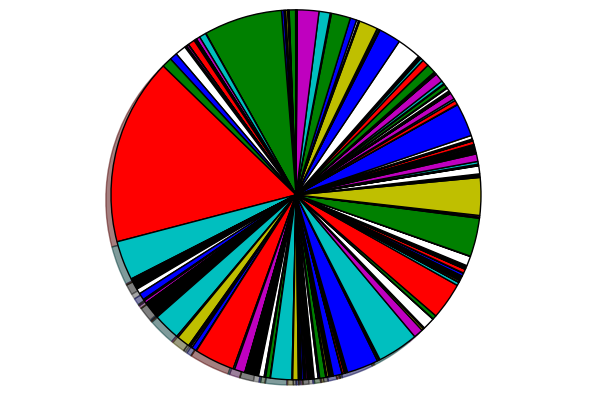

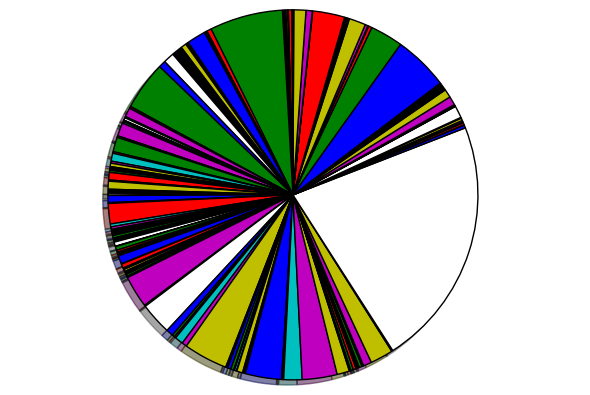

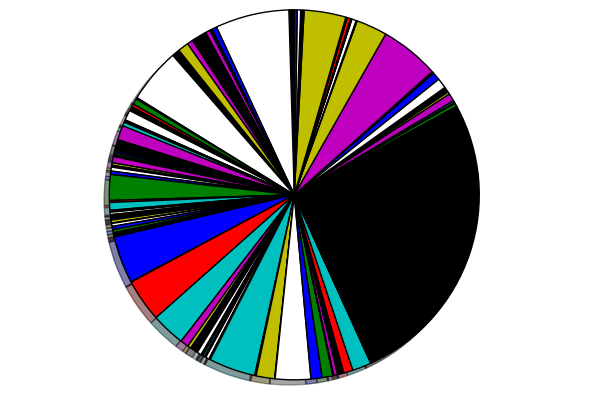

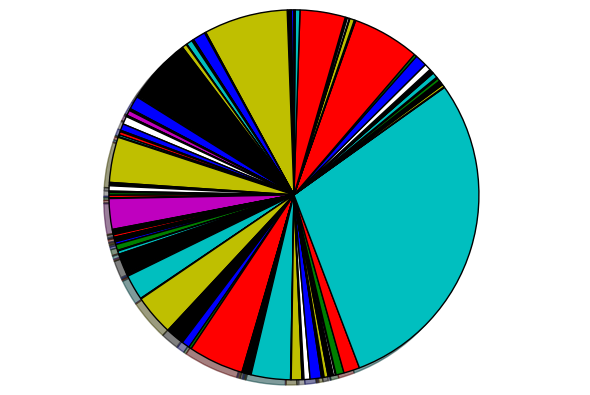

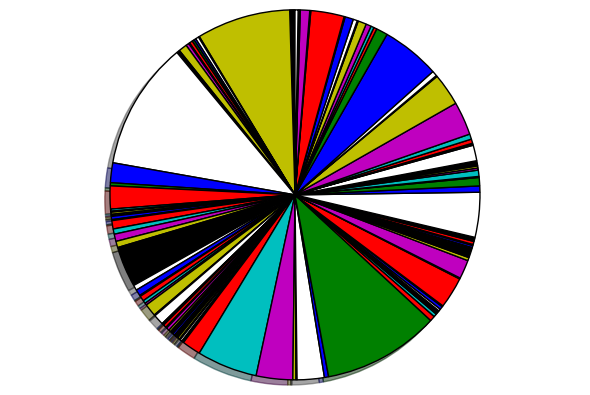

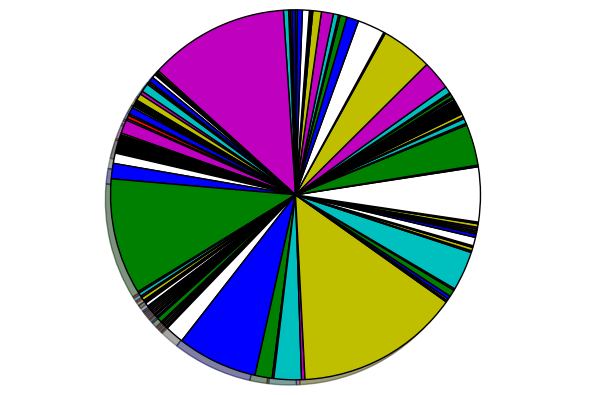

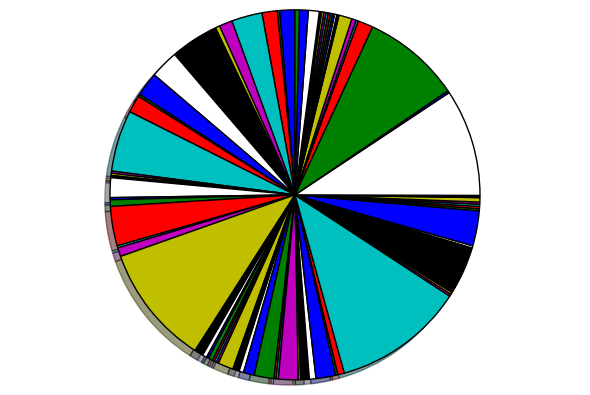

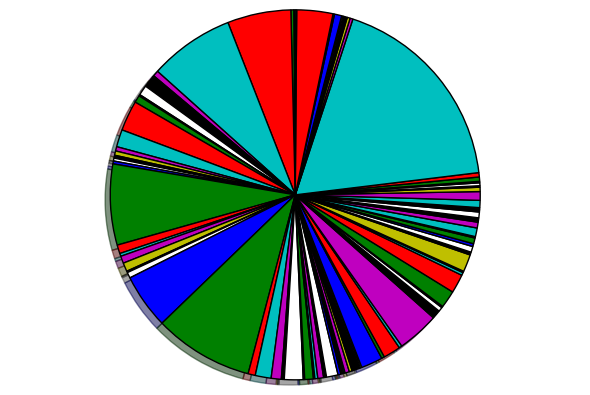

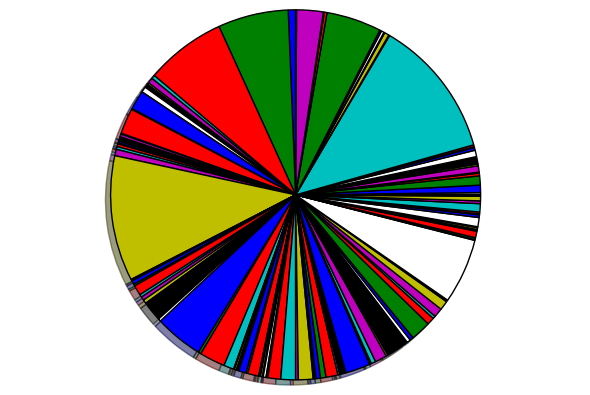

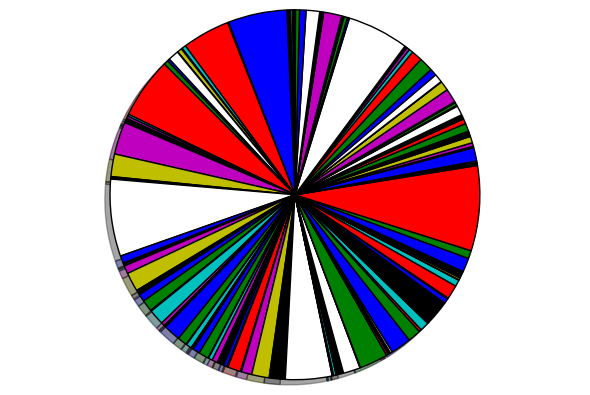

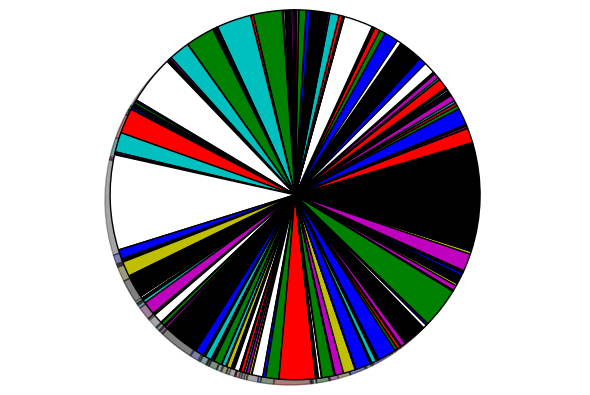

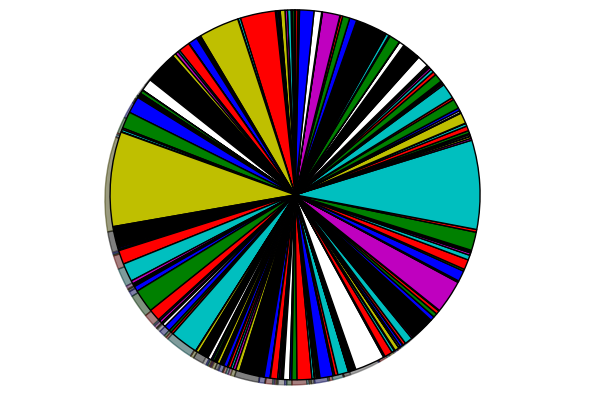

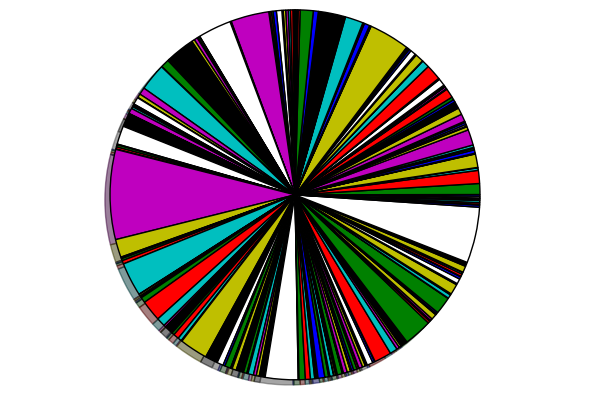

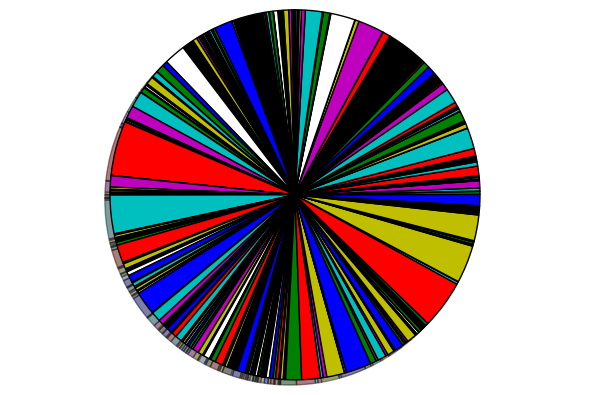

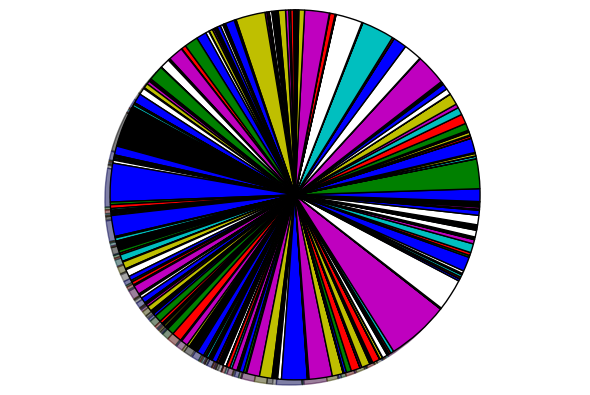

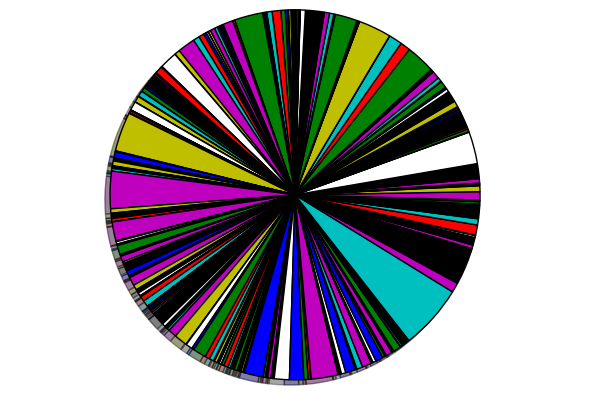

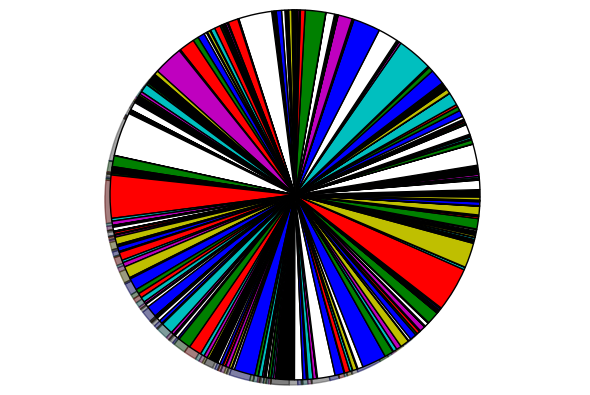

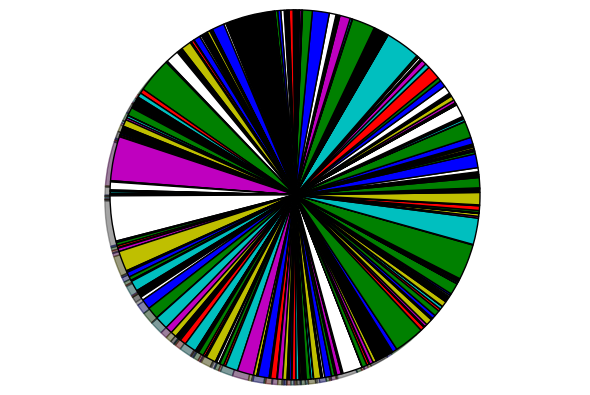

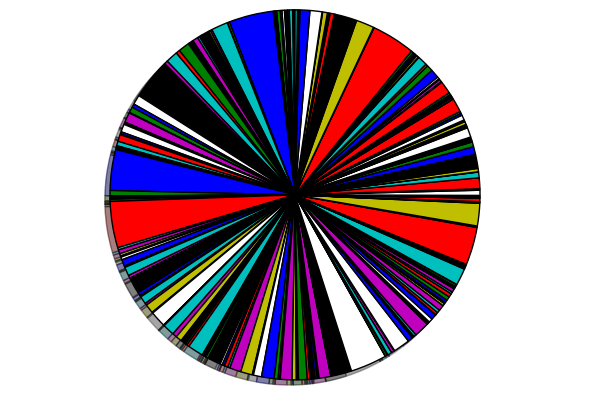

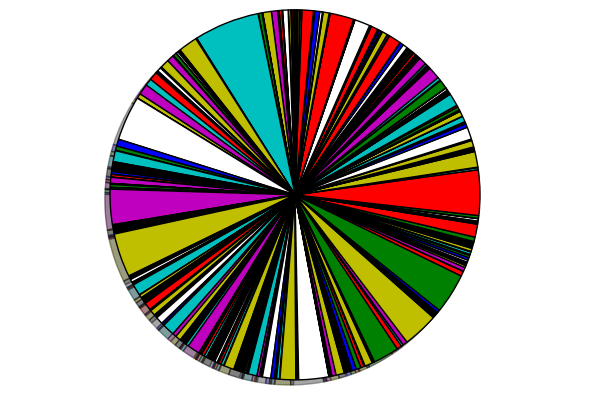

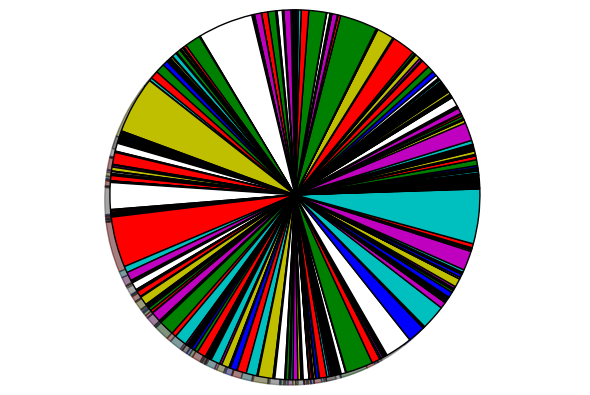

In [83]:
def pie_chart(town_checkin):
    for hours, checkin in town_checkin.items():
        categories=[]
        count=[]
        for key, indiv_checkin in checkin.items():
            categories.append(key)
            count.append(indiv_checkin)
        member, texts = plt.pie(count, shadow=True, startangle=90)
        plt.legend(member, categories, loc="best")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()

pie_chart(austin_pie_chart)

In [17]:
# Input: {userid : freq, ...}
# Return: {userid : normalized_freq, ...}

def normalized(vect):
    ret = {}
    
    total = 0
    
    for userid, freq in vect.iteritems():
        total += freq**2
    
    normalizer = math.sqrt(total)
    
    for userid, freq in vect.iteritems():
        ret[userid] = float(float(freq)/float(normalizer))
        
    return ret

In [7]:
from math import radians, cos, sin, asin, sqrt

# Taken from Micheal Dunn from post http://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points

def distance(v1, v2):
    lon1 = float(v1["longitude"])
    lat1 = float(v1["latitude"])
    lon2 = float(v2["longitude"])
    lat2 = float(v2["latitude"])

    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [ ]:
# Input: {venueid : {"latitiude" : latitude, "longitude" : longitude, "type" : type}, ...}
#        number of nearest venues
# Return: {venueid : [venueid, ...], ...}

import heapq

def get_nearest_venues(info, n):
    ret = {}
    l = len(info.keys())
    c = 0
    
    for v1 in info.keys():
        if c % (l/100) == 0:
            print c, "/", l
        c += 1
        dist = []
        size = 0
        ret[v1] = []
        
        for v2 in info.keys():
            if v1 == v2:
                continue
            
            d = distance(info[v1], info[v2])
            heapq.heappush(dist, (d, v2))
            size += 1
            
            if size > n:
                heapq.heappop(dist)
                size -= 1
        
        while(size > 0):
            ret[v1].append(heapq.heappop(dist)[1])
            size -= 1
             
    return ret

austin_nearest = get_nearest_venues(austin_venue, 10)
houston_nearest = get_nearest_venues(houston_venue, 10)

0 / 8585
85 / 8585
170 / 8585
255 / 8585
340 / 8585
425 / 8585
510 / 8585
595 / 8585
680 / 8585
765 / 8585
850 / 8585
935 / 8585
1020 / 8585
1105 / 8585
1190 / 8585
1275 / 8585
1360 / 8585
1445 / 8585
1530 / 8585
1615 / 8585
1700 / 8585
1785 / 8585
1870 / 8585
1955 / 8585
2040 / 8585
2125 / 8585
2210 / 8585
2295 / 8585
2380 / 8585
2465 / 8585
2550 / 8585
2635 / 8585
2720 / 8585
2805 / 8585
2890 / 8585
2975 / 8585
3060 / 8585
3145 / 8585
3230 / 8585
3315 / 8585
3400 / 8585
3485 / 8585
3570 / 8585


In [ ]:
# Input: {userid : freq, ...}, {userid : freq, ...}
# Return: similarity score

def cosine_sim(vec1, vec2):
    ret = 0
    
    v1 = normalized(vec1)
    v2 = normalized(vec2)
    
    common_keys = list(set(v1.keys() & set(v2.keys())))
    
    for k in common_keys:
        ret += v1[userid]*v2[userid]
    
    return ret

In [ ]:
# Input: {venueid : {userid : checkin_freq, ...}, ...},
#        {venueid : [venueid, ...], ...}
# Return: Nv x Nv Affinity Matrix; Nv = # venues
#         {venueid : {venueid : score, ...}, ...}

def create_affinity_matrix(venues, nearest):
    alpha = 0.01
    
    ret = {}
    
    for v1 in venues.keys():
        for v2 in venues.keys():
            if not ret.has_key(v1):
                ret[v1] = {}
                
                if v2 in nearest[v1]:
                    ret[v1][v2] = cosine_sim(venues[v1], venues[v2]) + alpha
                else:
                    ret[v1][v2] = 0
                    
    return ret

austin_affinity = create_affinity_matrix(austin_checkin_freq[0], austin_nearest)
houston_affinity = create_affinity_matrix(houston_checkin_freq[0], houston_nearest)

In [ ]:
print austin_affinity

Another function is here

In [3]:
def cubed(x):
    """ Return the cube of a  
        value """
    return x ** 3

cubed(3)

27

### Here, we gonna plot our clusters

Description's here...

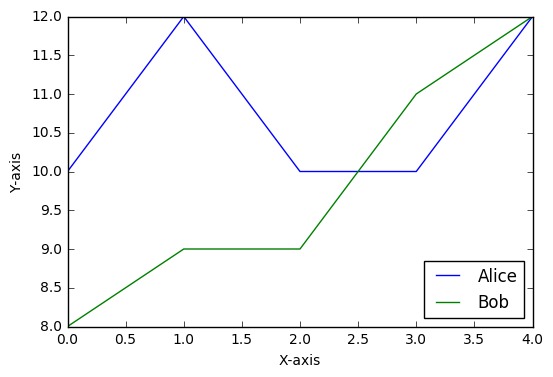

In [72]:
# this line prepares IPython for working with matplotlib
%matplotlib inline  

import matplotlib.pyplot as plt  

x = [0, 1, 2, 3, 4]  
y1 = [10, 12, 10, 10, 12]
y2 = [8, 9, 9, 11, 12]
line_up, = plt.plot(x, y1, label = "Alice")
line_down, = plt.plot(x, y2, label = "Bob") 
# your code here (plus you may need to modify the previous two lines)
plt.legend(handles=[line_up, line_down], loc = 4)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")

Another **markdown cell** here!